In [1]:
#Aim: Explore the loanAmount Feature and its significance to the Loan_Status target
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#load the data just move 2 folders out of current dir
raw_data_df = pd.read_csv("../../data/raw_data.csv")
raw_loanAmount_df = raw_data_df[["LoanAmount"]]
#print(len(raw_loanAmount_df))

## Missing Values

In [3]:
#View the % of missing values in LoanAmount
missing_values = raw_loanAmount_df.isnull().sum()
perc_missing_values = (missing_values.LoanAmount/len(raw_data_df))*100
print(f"Percentage of missing Values: {perc_missing_values.__round__(2)}%")

Percentage of missing Values: 3.58%


Percentage of missing Values is less than 10%; thus Imputation will occur. missing values will be replaced by the mean.

In [4]:
#fill missing values with mean
raw_data_df['LoanAmount'].fillna(
    raw_data_df['LoanAmount'].mean()#, inplace=True
)
loanAmount_df = raw_data_df[['LoanAmount']]
print(len(raw_data_df))

614


## Outliers Identification
- Identify Outliers
- Inspect what they mean
- Handle the outliers based on the results of the inspection

In [5]:
#find the quartile ranges to identify outliers
Q1= raw_data_df['LoanAmount'].quantile(0.25) 
Q2= raw_data_df['LoanAmount'].quantile(0.5)
Q3= raw_data_df['LoanAmount'].quantile(0.75)

inter_quartile_range = Q3-Q1

#find the inter quartile ranges
lower_bound = Q1 - (1.5*inter_quartile_range)
upper_bound = Q3 + (1.5*inter_quartile_range)

#isolate outliers
outliers_indexes = []
counter = 0
for index, row in enumerate(raw_data_df['LoanAmount']):
    if row < lower_bound:
        outliers_indexes.append(index)
    else:
        if row > upper_bound:
            outliers_indexes.append(index)  

#print(lower_bound)

In [6]:
#Locate the outliers using the indexes from outliers_indexes
Outliers_df = raw_data_df['LoanAmount'].loc[outliers_indexes]
#print(len(Outliers_df))
#print(Outliers_df.index)

#isolate outliers
Outliers_df = raw_data_df['LoanAmount'].loc[outliers_indexes]

num_of_Outliers = len(outliers_indexes)
percentage_of_outliers = (num_of_Outliers)*100/len(loanAmount_df)
print(f"The percentage of outliers:\t{percentage_of_outliers.__round__(2)}%")


The percentage of outliers:	6.35%


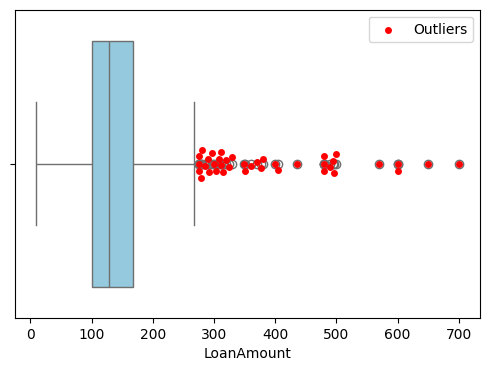

In [7]:
#Plot the box plot of the loanAmount column
plt.figure(figsize=(6,4))
sns.boxplot(x=raw_data_df['LoanAmount'], color='skyblue')
sns.swarmplot(x=Outliers_df, color='red', label='Outliers')
plt.show() 

#### Outliers are 6.68% of the data
- What these outliers mean for our data:<br><br>
  - All the outliers lie above the Boundry: Q3 + 1.5*inter_quartile_range
  - These are applicants seeking an exceptionally high loan.
  - These high loans may be considered a risk for the company.
  - And because they constitute to only 6.68% of the data they are not regular occurences.
  Thus keeping them might affect the model during training (this will be explored once the model is trained) and cause skewness of data. 
  - For now these outliers will be removed

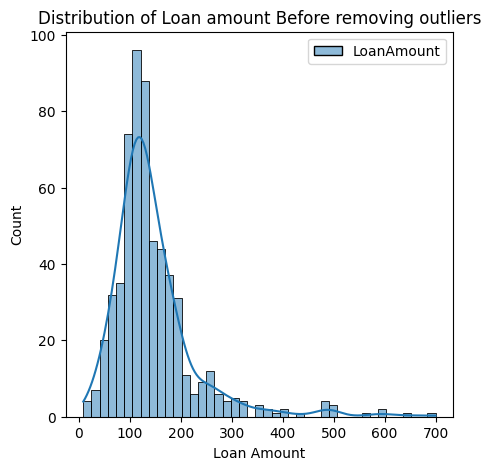

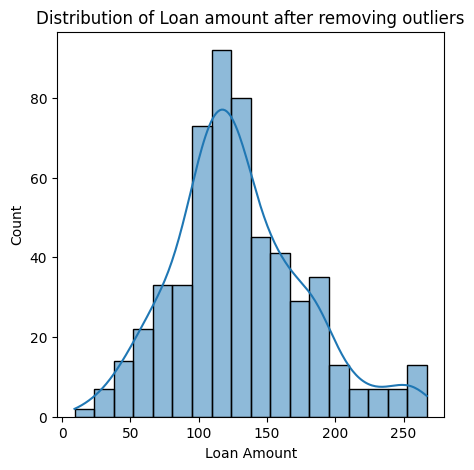

In [8]:
#removing Outliers
#Drop the whole rows with outliers was using inplace !(run once)
raw_data_df.drop(outliers_indexes, inplace=True)

#check the distribution of loan amount:
plt.figure(figsize=(5, 5))
sns.histplot(loanAmount_df, kde=True)
plt.title('Distribution of Loan amount Before removing outliers')
plt.xlabel('Loan Amount')

 
plt.figure(figsize=(5, 5))
sns.histplot(raw_data_df['LoanAmount'], kde=True)
plt.title('Distribution of Loan amount after removing outliers')
plt.xlabel('Loan Amount')
plt.show()


In [9]:
#Statistical measures

#Central Tendency
mean = raw_data_df['LoanAmount'].mean().__round__(2)
median = raw_data_df['LoanAmount'].median().__round__(2)

#Spread or Dispersion
std = raw_data_df['LoanAmount'].std().__round__(2)
min = raw_data_df['LoanAmount'].min().__round__(2)
max = raw_data_df['LoanAmount'].max().__round__(2)

#Skewness
skew_coef =raw_data_df['LoanAmount'].skew().__round__(2)
#K>0, heavier tails, K<0: lighter tails, k approx. 0: SIMILAR TAILS TO NORMAL
kurt_coeff = raw_data_df['LoanAmount'].kurt().__round__(2)
 
print(f"Central Tendency:\n mean: {mean}\t median: {median}\n")
print(f"Spread:\n Standard deviation: {std}\t min:{min}\tmax:{max}\n")
print(f"Skewness coefficient: {skew_coef}\tKurtosis coefficent: {kurt_coeff}")


Central Tendency:
 mean: 129.0	 median: 124.0

Spread:
 Standard deviation: 47.93	 min:9.0	max:267.0

Skewness coefficient: 0.5	Kurtosis coefficent: 0.34


### key take away:
- Majority of applicants apply for loan amount close to the average 129.19 (mean) as the median of 125 is not far from the mean.<br><br>
- The standard deviation of 46.5 indicates the loans applicants apply for, vary from the mean by approximately 46.5.<br><br>
- The maximum loan of 260 is alomst (mean + 3*std) away from the mean.<br><br>
- The minimum value of 9, is approximately (mean - 2.6*std) away from the mean, we expect it to be (mean - 3*std), this may show a slight skewness toward to higher loans amount. Applicants may be applying for higher loan amounts over lower ones.<br><br>
- Kurtosis coefficent of 0.37, suggests a similar distribution to the normal distribution.<br><br>   
- The skewness coefficent of 0.43, suggests that the data is slightly right-skewed, this could indicate there is still some larger loan amounts (outliers) skewing the data slightly to the right, but not heavily as the skewness values lies between [-0.5, 0.5]. Thus these large loan amounts wont cause much bias when training the model.


## Bivariant Visualization

Aim: Explore and understand the relationship between Loan amounts and Loan status. 

In [10]:
fig = px.box(data_frame=raw_data_df['LoanAmount'], x='LoanAmount', color=raw_data_df['Loan_Status'],
                 title=f'BoxPlot for Feature:LoanAmount against the Target: Loan_Status')
fig.update_layout(xaxis_title=f'Loan_Status Feature')
fig.show()

#### Observation
From the above plots, there is still a significant amount of outliers in both 'Yes' and 'No' plots. however, due to the removal of the outliers in the LoanAmount column previously, reomval of more outliers may compromise the size of the training and testing dataset. <br>
<br>
Hence, Log transformation will be used to reduce the impact of these outliers on the dataset. 



In [11]:
import numpy as np

# Log transformation
raw_data_df['Log_LoanAmount'] = np.log(raw_data_df['LoanAmount']) #created a new column
#print(raw_data_df.columns)

# Plot the transformed data
fig = px.histogram(data_frame=raw_data_df, x='Log_LoanAmount', color='Loan_Status',
                   title='Histogram for Feature: LOG(LoanAmount) against the Target: Loan_Status',
                   facet_col='Loan_Status')
fig.update_layout(xaxis_title='Log(LoanAmount) Feature', showlegend=False)
fig.show()


#### Statistical analysis using LoanAmount and Loan_Status


In [12]:
#To avoid scaling back using exp() well work with LoanAmount over log_LoanAmount
#Seperate column between yes and no
yes_df = raw_data_df[raw_data_df['Loan_Status'] == 'Y'][['LoanAmount']]
no_df = raw_data_df[raw_data_df['Loan_Status'] == 'N'][['LoanAmount']]

#Stats

#mean
mean_yes = yes_df['LoanAmount'].mean().__round__(2)
mean_no = no_df['LoanAmount'].mean().__round__(2)

#standard deviation
std_yes = yes_df['LoanAmount'].std().__round__(2)
std_no = no_df['LoanAmount'].std().__round__(2)

#skewness
skew_yes = yes_df['LoanAmount'].skew().__round__(2)
skew_no = no_df['LoanAmount'].skew().__round__(2)

#min max
min_yes = yes_df['LoanAmount'].min().__round__(2)
max_yes =yes_df['LoanAmount'].max().__round__(2)
mode_yes =yes_df['LoanAmount'].mode().__round__(2)
min_no = no_df['LoanAmount'].min().__round__(2)
max_no =no_df['LoanAmount'].max().__round__(2)

#print(yes_df.columns)
print(f"Total number:\n Yes: {len(yes_df)}\tNo: {len(no_df)}\n")
print(f"Range of Values:")
print(f"\tYes\n \tmin: {min_yes}\t max: {max_yes}\t mode: {mode_yes}")
print(f"\tNo\n min: {min_no}\t max: {max_no}")
print(f"The mean (average):\nYes: {mean_yes}\tNo: {mean_no}\n")
print(f"The Standard deviation (spread):\nYes: {std_yes}\tNo: {std_no}\n")
print(f"The skewness coeffcient:\nYes: {skew_yes}\tNo: {skew_no}\n")



Total number:
 Yes: 398	No: 177

Range of Values:
	Yes
 	min: 17.0	 max: 267.0	 mode: 0    120.0
Name: LoanAmount, dtype: float64
	No
 min: 9.0	 max: 265.0
The mean (average):
Yes: 128.01	No: 131.31

The Standard deviation (spread):
Yes: 47.1	No: 49.88

The skewness coeffcient:
Yes: 0.48	No: 0.54



Key Takeawyas:
- There is a total of 397 yes' and 176 no's for loan status for each group (69.28% of the data has a 'Yes' qualifying loan status). 
-From the histograms, most loanAmounts under the class Yes lie betweeen 120 and 181.27. 
- Although the LoanAmounts in this range, under 'No', amount to the highest count for this class, there is a significantly higher number of loanAmounts in class 'Yes' in this range than there are in class 'No'.
- The mean and the standard deviation values do not differ by much, but the significant difference in the number of loanAmount in class 'Yes' and in class 'No' suggests that loan amounts do affect the loan status to some degree.
- lastly, it can be drawn that loan amounts between 0 and 16 will fall under class 'No'.   
